<a href="https://colab.research.google.com/github/tauseefhashmi/DataEngineeringKafkaPipelineStocks/blob/main/Analytics_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EfficientNetB0

###Import the Libraries and Functions.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!pip install keras
!pip install tensorflow
!pip install pandas 
!pip install sklearn 
!pip install matplotlib
!pip install fastapi
!pip install python-multipart

In [14]:
import os 
import zipfile
import tensorflow
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from zipfile import *
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Unzip the Dataset zip File in Google Drive and Load the Data.

In [ ]:
!unzip -q /content/drive/MyDrive/GoogleCollabWork/Traffic.zip -d /content/drive/MyDrive/GoogleCollabWork/Traffic1  #unzip data in tmp/

### TIME CONSUMING PROCESSING OF IMAGES AND LABELLING THEM

In [ ]:
image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3
input_path = '/content/drive/MyDrive/GoogleCollabWork/Traffic1'

for i in range(total_classes):
    path = input_path + '/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '//' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

####Converting lists into numpy arrays

In [ ]:
h1=image_data
h2=image_labels

In [ ]:
#Converting lists into numpy arrays
image_data = numpy.array(image_data)
image_labels = numpy.array(image_labels)

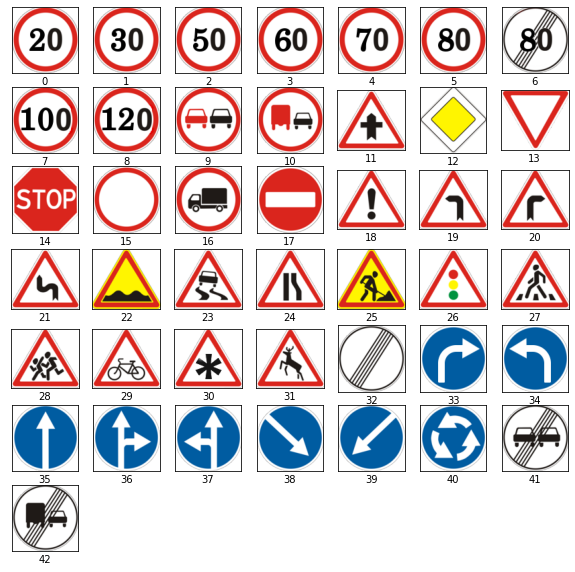

In [ ]:
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = input_path + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

####shuffling data

In [ ]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

###Splitting training and testing dataset

In [ ]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

#X_train = X_train/255 
#X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (1841, 64, 64, 3)
X_valid.shape (461, 64, 64, 3)
y_train.shape (1841,)
y_valid.shape (461,)


In [ ]:
#Converting the labels into one hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, total_classes)
y_valid = tensorflow.keras.utils.to_categorical(y_valid, total_classes)
print(y_train.shape)
print(y_valid.shape)

(1841, 43)
(461, 43)


# Modelling

## EfficientNetB0 

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(input_shape = (64, 64, 3), include_top = False, weights = 'imagenet')

In [ ]:
# Untraining existing weights
for layer in model.layers:
    layer.trainable = False

In [ ]:
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(y_train.shape[1], activation="softmax")(x)
model_final = Model(model.input, predictions)

### B0  Model using Adam Optimizer LR=0.0001 and Decay=1e-6

In [ ]:
model2_final=model_final

In [ ]:
model_final.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate= 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
eff_history = model_final.fit(x=X_train,y=y_train,batch_size=64, validation_data =(X_valid, y_valid), steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 63s 580ms/step - loss: 0.2333 - accuracy: 0.0495 - val_loss: 0.0893 - val_accuracy: 0.3537
Epoch 2/15
100/100 [==============================] - 61s 609ms/step - loss: 0.1184 - accuracy: 0.1627 - val_loss: 0.0740 - val_accuracy: 0.4778
Epoch 3/15
100/100 [==============================] - 57s 572ms/step - loss: 0.0993 - accuracy: 0.2659 - val_loss: 0.0646 - val_accuracy: 0.5369
Epoch 4/15
100/100 [==============================] - 60s 602ms/step - loss: 0.0872 - accuracy: 0.3355 - val_loss: 0.0576 - val_accuracy: 0.5815
Epoch 5/15
100/100 [==============================] - 59s 596ms/step - loss: 0.0791 - accuracy: 0.3943 - val_loss: 0.0532 - val_accuracy: 0.6102
Epoch 6/15
100/100 [==============================] - 57s 569ms/step - loss: 0.0714 - accuracy: 0.4430 - val_loss: 0.0495 - val_accuracy: 0.6436
Epoch 7/15
100/100 [==============================] - 59s 591ms/step - loss: 0.0666 - accuracy: 0.4798 - val_loss: 0.0465 - val_ac

In [ ]:
#Save the Model
model_final.save("B0ModelusingAdamOptimizerLRandDecay.h5")


###BO Model with RMSprop optimizer LR=0001 and Decay=1e-6

In [ ]:
model3_final=model2_final

In [ ]:
model2_final.compile(tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
eff2_history = model2_final.fit(x=X_train,y=y_train,batch_size=64, validation_data =(X_valid, y_valid), steps_per_epoch = 100, epochs = 15)


Epoch 1/15
100/100 [==============================] - 57s 511ms/step - loss: 0.0433 - accuracy: 0.6705 - val_loss: 0.0321 - val_accuracy: 0.7762
Epoch 2/15
100/100 [==============================] - 48s 482ms/step - loss: 0.0415 - accuracy: 0.6747 - val_loss: 0.0309 - val_accuracy: 0.7897
Epoch 3/15
100/100 [==============================] - 49s 488ms/step - loss: 0.0407 - accuracy: 0.6823 - val_loss: 0.0299 - val_accuracy: 0.7988
Epoch 4/15
100/100 [==============================] - 49s 493ms/step - loss: 0.0395 - accuracy: 0.7002 - val_loss: 0.0291 - val_accuracy: 0.8063
Epoch 5/15
100/100 [==============================] - 50s 505ms/step - loss: 0.0379 - accuracy: 0.7079 - val_loss: 0.0284 - val_accuracy: 0.8140
Epoch 6/15
100/100 [==============================] - 48s 483ms/step - loss: 0.0358 - accuracy: 0.7333 - val_loss: 0.0274 - val_accuracy: 0.8207
Epoch 7/15
100/100 [==============================] - 48s 485ms/step - loss: 0.0353 - accuracy: 0.7336 - val_loss: 0.0267 - val_ac

In [ ]:
###Save the Model
model2_final.save("B0withRMSProp.h5")

## EfficientNet B7

In [ ]:
from tensorflow.keras.applications import EfficientNetB7
model = EfficientNetB7(input_shape = (64, 64, 3), include_top = False, weights = 'imagenet')

In [ ]:
# Untraining existing weights
for layer in model.layers:
    layer.trainable = False

In [ ]:
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(y_train.shape[1], activation="softmax")(x)
model_final = Model(model.input, predictions)

###B7 Model using Adam Optimizer LR=0.0001 and Decay=1e-6

In [ ]:
model3_final=model2_final

In [ ]:
model3_final.compile(tensorflow.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
eff3_history = model3_final.fit(x=X_train,y=y_train,batch_size=64, validation_data =(X_valid, y_valid), steps_per_epoch = 150, epochs = 20)

Epoch 1/20
150/150 [==============================] - 59s 397ms/step - loss: 0.0179 - accuracy: 0.8832 - val_loss: 0.0118 - val_accuracy: 0.9387
Epoch 2/20
150/150 [==============================] - 58s 388ms/step - loss: 0.0171 - accuracy: 0.8953 - val_loss: 0.0117 - val_accuracy: 0.9385
Epoch 3/20
150/150 [==============================] - 58s 388ms/step - loss: 0.0174 - accuracy: 0.8907 - val_loss: 0.0114 - val_accuracy: 0.9424
Epoch 4/20
150/150 [==============================] - 59s 395ms/step - loss: 0.0168 - accuracy: 0.8955 - val_loss: 0.0113 - val_accuracy: 0.9411
Epoch 5/20
150/150 [==============================] - 59s 395ms/step - loss: 0.0163 - accuracy: 0.9027 - val_loss: 0.0112 - val_accuracy: 0.9417
Epoch 6/20
150/150 [==============================] - 59s 395ms/step - loss: 0.0167 - accuracy: 0.8973 - val_loss: 0.0110 - val_accuracy: 0.9445
Epoch 7/20
150/150 [==============================] - 59s 395ms/step - loss: 0.0167 - accuracy: 0.8971 - val_loss: 0.0109 - val_ac

In [ ]:
#Save The Model
model3_final.save("B7ModelusingAdamOptimizerLRandDecay.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


### B7 with RMSprop Optimizer LR=0.0001 and Decay=1e-6

In [ ]:
model2_final=model_final

In [ ]:
model_final.compile(optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate= 0.0001,decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
eff_history = model_final.fit(x=X_train,y=y_train,batch_size=64, validation_data =(X_valid, y_valid), steps_per_epoch = 100, epochs = 20)

Epoch 1/20
100/100 [==============================] - 352s 3s/step - loss: 0.2161 - accuracy: 0.0306 - val_loss: 0.1069 - val_accuracy: 0.0766
Epoch 2/20
100/100 [==============================] - 328s 3s/step - loss: 0.1446 - accuracy: 0.0436 - val_loss: 0.1025 - val_accuracy: 0.1279
Epoch 3/20
100/100 [==============================] - 322s 3s/step - loss: 0.1247 - accuracy: 0.0645 - val_loss: 0.1001 - val_accuracy: 0.2100
Epoch 4/20
100/100 [==============================] - 321s 3s/step - loss: 0.1169 - accuracy: 0.0769 - val_loss: 0.0976 - val_accuracy: 0.1701
Epoch 5/20
100/100 [==============================] - 320s 3s/step - loss: 0.1110 - accuracy: 0.0938 - val_loss: 0.0949 - val_accuracy: 0.2085
Epoch 6/20
100/100 [==============================] - 318s 3s/step - loss: 0.1071 - accuracy: 0.1133 - val_loss: 0.0939 - val_accuracy: 0.2413
Epoch 7/20
100/100 [==============================] - 319s 3s/step - loss: 0.1049 - accuracy: 0.1220 - val_loss: 0.0919 - val_accuracy: 0.2343

In [ ]:
### Save the Model
model_final.save("B7withRMSpropOptimizer.h5")

##PLOT THE GRAPHS

In [ ]:
#Here Enter the Variable in which the Model.fit was stored.
history=eff3_history ##<<==KINDLY PUT THE VARIABLE INPLACE OF eff3_history

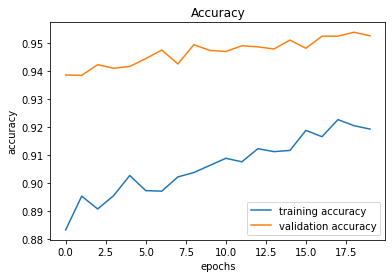

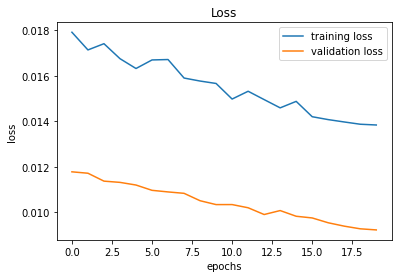

In [ ]:
#plotting graphs for Accuracy of The Model 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
pd.DataFrame(eff_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

### Dictionary to Label all the Classes

In [ ]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

###TESTING ACCURACY ON TEST DATASET

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

test = pd.read_csv('/content/drive/MyDrive/GoogleCollabWork/Traffic1/Test.csv')
print(test["ClassId"].values)
print(test["Path"].values)
labels = test["ClassId"].values
imgs = test["Path"].values
print(imgs)
data=[]
for img in imgs:
    image = Image.open((img))
    image = image.resize((30,30))
    data.append(np.array(image))
  
X_valid=np.array(data)
pred1 = model_final.predict(X_valid)
pred = np.argmax(pred1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

#COMPARING WITH VGG

In [ ]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

In [ ]:
#Converting the labels into one hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train,)
y_valid = tensorflow.keras.utils.to_categorical(y_valid,)
print(y_train.shape)
print(y_valid.shape)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:
base_model = VGG16(input_shape = (64, 64, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
vgghist = model.fit(X_train, y_train, batch_size=128, epochs=3,validation_data=(X_valid, y_valid))

## CODE FOR THE WEB APP only For Cloud Deployment

In [ ]:
import os
cwd = os.getcwd()
print(cwd)


In [15]:
from tensorflow.keras.models import load_model
from fastapi import FastAPI, UploadFile, File
from PIL import Image
import numpy as np
import shutil

model = load_model('Traffic_classifier.h5')
app = FastAPI()


def detect(img):
    # detect_list=[]
    classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
    image = Image.open((img))
    image = image.resize((64,64))
    image = np.expand_dims(image, axis=0)
    detect_list = np.array(image)
    pred = model.predict([detect_list])[0]
    pred = np.argmax(pred)
    prediction = classes[int(pred)+1]
    return prediction

@app.post('/detect_sign')
def root(file: UploadFile = File(...)):
    with open(file.filename, 'wb') as buffer:
        shutil.copyfileobj(file.file, buffer)
    prediction = detect(img=file.filename)
    return {"prediction":prediction}

##GUI for the App. ONLY FOR LOCAL MACHINE

In [ ]:
!pip install tkinter

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

#Load the Model
model = load_model('traffic_classifier.h5')

#initialise GUI
top=tk.Tk(screenName=Hey)
top.geometry('800x600')
top.title('Traffic Sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred1 = model_final.predict([image])[0]
    pred  = numpy.argmax(pred1)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

#FLASK DEPLOYMENT

In [18]:
model=load_model('Traffic_classifier.h5')

In [ ]:
!pip install -q streamlit

In [ ]:
# %%writefile app.py
import streamlit as st
import tensorflow as tf



@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/MyDrive/GoogleCollabWork/Traffic1/traffic_classifier.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Traffic Sign Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (64,64)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
!pip install ngrok
!pip install flask_ngrok

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return root()

from tensorflow.keras.models import load_model
from fastapi import FastAPI, UploadFile, File
from PIL import Image
import numpy as np
import shutil

model = load_model('Traffic_classifier.h5')
app2 = FastAPI()


def detect(img):
    # detect_list=[]
    classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
    image = Image.open((img))
    image = image.resize((64,64))
    image = np.expand_dims(image, axis=0)
    detect_list = np.array(image)
    pred = model.predict([detect_list])[0]
    pred = np.argmax(pred)
    prediction = classes[int(pred)+1]
    return prediction
from google.colab import files
uploaded = files.upload()
@app.route('/detect_sign')
def root(file:uploaded):
    with open(file.filename, 'wb') as buffer:
        shutil.copyfileobj(file.file, buffer)
    prediction = detect(img=file.filename)
    return {"prediction":prediction}

app.run()